# Importações das Bibliotecas


In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import normaltest
from scipy.stats import ranksums

import warnings
warnings.filterwarnings('ignore')

# Importação do Dataset

In [141]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [142]:
notas = pd.read_csv("ratings.csv")
notas.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [143]:
filmes = pd.read_csv("movies.csv")
filmes.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


# Exploração do Dataset

In [144]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [145]:
tmdb.shape

(4803, 20)

In [146]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# Análise da qualidade dos dados

Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000')

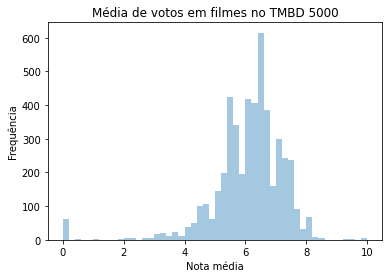

In [147]:
ax = sns.distplot(tmdb.vote_average, norm_hist = False, kde = False)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMBD 5000')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

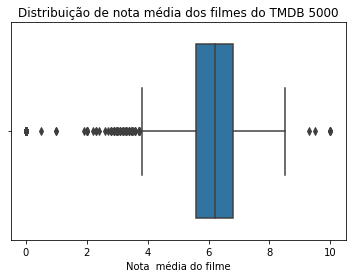

In [148]:
ax = sns.boxplot(tmdb.vote_average)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000')

In [149]:
tmdb.query('vote_average == 0').head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0


Não faz sentido ter filmes cuja a media é zero. Com isso, foi detectado que alguns filmes tiveravam poucos votos ou nenhum. Sendo assim, esses filmes não vão pertencer a analise.

In [150]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')

Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000 com 10 ou mais votos')

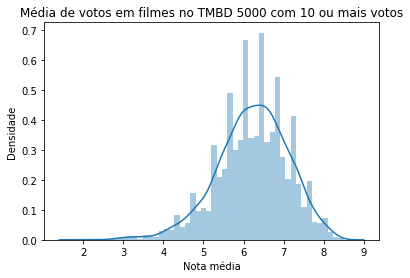

In [151]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMBD 5000 com 10 ou mais votos')

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 com 10 ou mais votos')

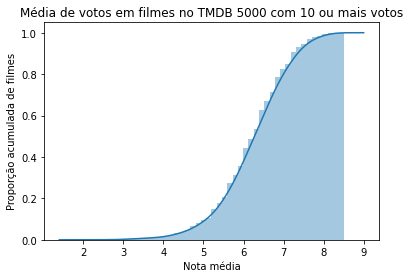

In [152]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.set(xlabel='Nota média', ylabel='Proporção acumulada de filmes')
ax.set_title('Média de votos em filmes no TMDB 5000 com 10 ou mais votos')

Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000 com 10 ou mais votos')

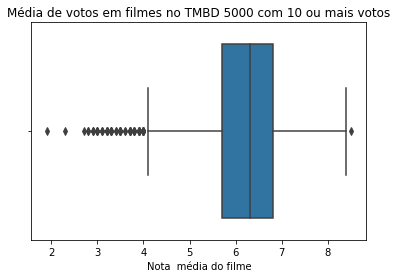

In [153]:
ax = sns.boxplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Média de votos em filmes no TMBD 5000 com 10 ou mais votos')

**<h2>Analisando o movielens</h2>**

In [154]:
nota_media_por_filme = notas.groupby("movieId").mean()["rating"]
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens')

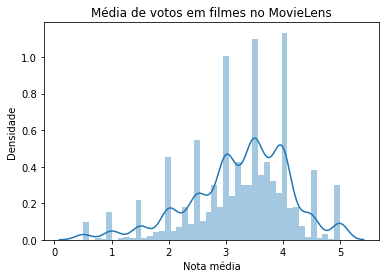

In [155]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no MovieLens')

In [156]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [157]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens')

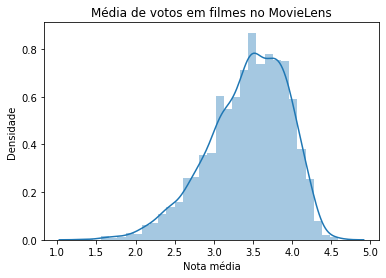

In [158]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no MovieLens')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do MovieLens')

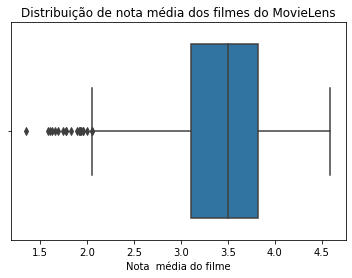

In [159]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes do MovieLens')

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens')

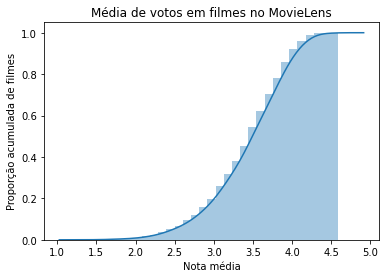

In [160]:
# Visualizar de maneira acumulativa.

ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.set(xlabel='Nota média', ylabel='Proporção acumulada de filmes')
ax.set_title('Média de votos em filmes no MovieLens')

# Analise Macro

Analisando a distribuição dos dados capturados de outros campos do TMDB

Text(0.5, 1.0, 'Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

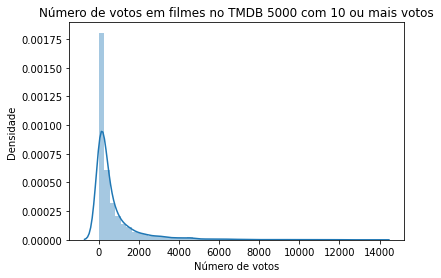

In [161]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel='Número de votos', ylabel='Densidade')
ax.set_title('Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

Text(0.5, 1.0, 'Gastos em filmes no TMDB 5000')

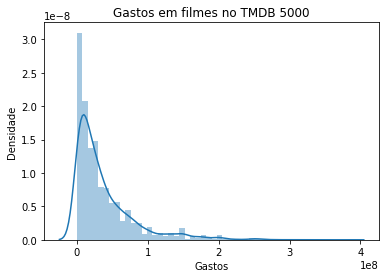

In [162]:
ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel='Gastos', ylabel='Densidade')
ax.set_title('Gastos em filmes no TMDB 5000')

Text(0.5, 1.0, 'Popularidade dos filmes no TMDB 5000')

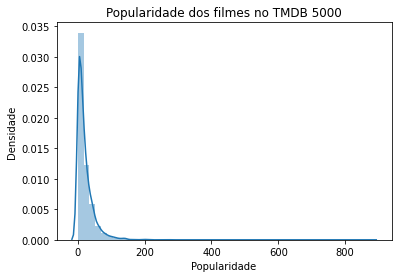

In [163]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel='Popularidade', ylabel='Densidade')
ax.set_title('Popularidade dos filmes no TMDB 5000')

In [164]:
tmdb.runtime.isnull().sum()

2

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

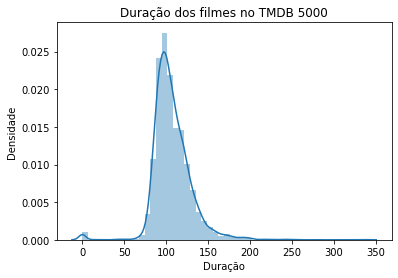

In [165]:
ax = sns.distplot(tmdb.runtime.dropna())
ax.set(xlabel='Duração', ylabel='Densidade')
ax.set_title('Duração dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

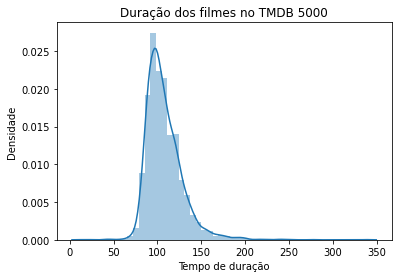

In [166]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna())
ax.set(xlabel='Tempo de duração', ylabel='Densidade')
ax.set_title('Duração dos filmes no TMDB 5000')

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

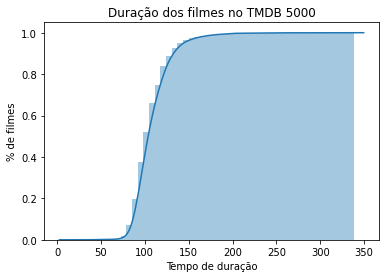

In [167]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna(),
                 hist_kws={'cumulative':True},
                 kde_kws={'cumulative':True})
ax.set(xlabel='Tempo de duração', ylabel='% de filmes')
ax.set_title('Duração dos filmes no TMDB 5000')

In [168]:
tmdb.query("runtime>0").runtime.dropna().quantile(q=0.8) # tempo que 80% dos filmes possui

121.0

## Movielens: média dos filmes com pelo menos 10 votos

In [169]:
print("Média dos filems com pelo menos 10 votos",nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média dos filems com pelo menos 10 votos 3.4320503405352603


In [170]:
nota_media_dos_filmes_com_pelo_menos_10_votos[0:5].mean()

3.5259741603585653

In [171]:
print("Total de notas com pelos menos 10 votos é:",len(nota_media_dos_filmes_com_pelo_menos_10_votos))

Total de notas com pelos menos 10 votos é: 2269


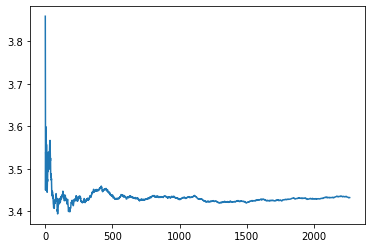

In [172]:
np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac = 1) # pegar todos em uma ordem aleatoria. frac = fração  100%

# medias = list()
# for i in range(1, len(temp)):
#   medias.append(temp[0:i].mean())

 # OU

medias = [(temp[0:i].mean()) for i in range(1, len(temp))]
plt.plot(medias)


dependendo da quantidade de amostras a media da nota do filme muda.

In [173]:
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

Dado o conjunto de dados, acreditando que ele é grande o suficiente. o zconfint mostrara o intevalo de confiança para todos os filmes em geral não só para os da amostra

In [174]:
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

## Comparação de 1 conjunto de amostra

In [175]:
filmes.query("movieId==1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [176]:
notas1 = notas.query("movieId ==1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

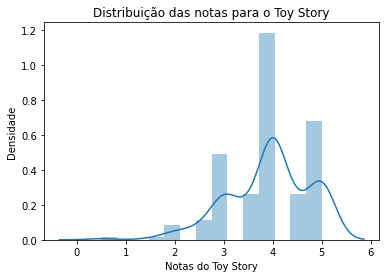

In [177]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel='Notas do Toy Story', ylabel='Densidade')
ax.set_title('Distribuição das notas para o Toy Story')

Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

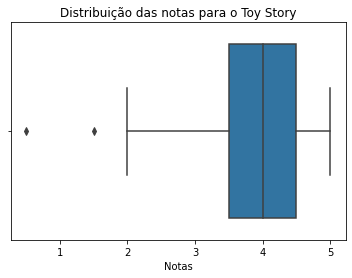

In [178]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel='Notas')
ax.set_title('Distribuição das notas para o Toy Story')

In [179]:
notas1.rating.mean()

3.9209302325581397

In [180]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [181]:
ztest(notas1.rating, value = 3.4320503405352603)

(8.586342305916716, 8.978190401886942e-18)

se for <= 0.05 é descartado a hipose de que o valor é igual value = 3.4320503405352603 

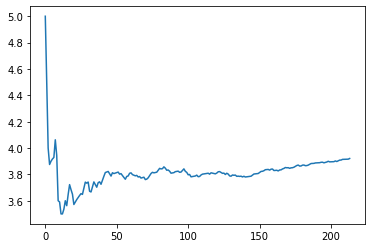

In [182]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

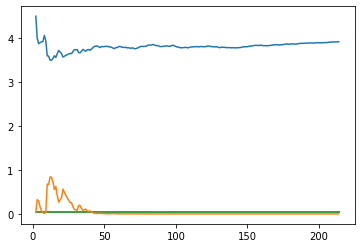

In [183]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.4320503405352603) 
    return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0],valores[:,1])
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors = 'green')


## Comparação de 2 conjunto de amostras

In [184]:
print (ztest(notas1.rating, notas.rating)) # z teste
zconfint(notas1.rating, notas.rating) # intervalo de confiança 

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [185]:
ttest_ind(notas.rating, notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [186]:
comparacao.summary(use_t = False) # z-test

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.430,-0.566,0.241


Intervalo de confiança t teste

In [187]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [188]:
comparacao.summary(use_t = True) # t-test

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

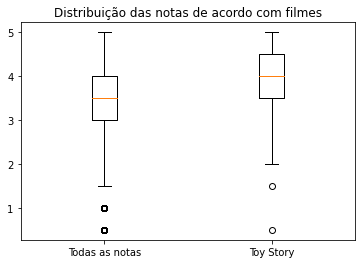

In [189]:
plt.boxplot([notas.rating, notas1.rating], labels=["Todas as notas", "Toy Story"])
plt.title("Distribuição das notas de acordo com filmes")

Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

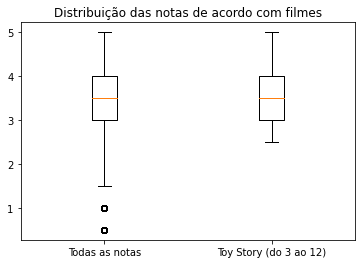

In [190]:
plt.boxplot([notas.rating, notas1[3:12].rating], labels=["Todas as notas", "Toy Story (do 3 ao 12)"])
plt.title("Distribuição das notas de acordo com filmes")

Caso tivesse uma quantidade menor na amostra poderia ter o resultado diferente onde, o toy story fica mais parecido com todos os filmes.

In [191]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


Como o p não é <= 0.05 não é possivel descartar que as medias são iguais. Se a situação fosse essa a conclusão seria que as medias são iguais ou que não tem dados suficientes para tomar uma decisão.


## Comparar a média de dois filmes

In [192]:
filmes.query("movieId in [1, 593, 72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Text(0.5, 1.0, 'Distribuição das notas de acordo com os filmes')

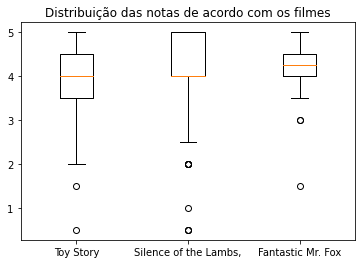

In [193]:
notas1 =  notas.query("movieId == 1")
notas593 =  notas.query("movieId == 593")
notas72226 =  notas.query("movieId == 72226")

plt.boxplot([notas1.rating, notas593.rating, notas72226.rating], labels=["Toy Story", "Silence of the Lambs,", "Fantastic Mr. Fox"])
plt.title("Distribuição das notas de acordo com os filmes")

In [194]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


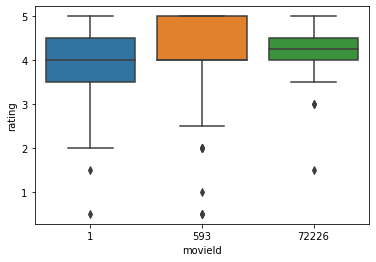

In [195]:
sns.boxplot(x = "movieId", y = "rating", data = notas.query("movieId in (1, 593, 72226)"))

In [196]:
notas.query("movieId in (1, 593, 72226)").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [197]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [198]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)

comparacao.summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [199]:
comparacao = descr_1.get_compare(descr_72226)

comparacao.summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


Olhar a quantidade de notas para saber qual teste aplicar. Sendo t teste para < 30 amostras e z teste para > 30

In [200]:
_, p = normaltest(notas1.rating)
p

0.00011053430732728716

como p <0.05 e foi descartada a hipotese nula. As notas1 do toy Story não vem de uma curva normal com isso não e certo aplicar o t-test e nem o z-teste.

In [201]:
# Usado quando a curva não é normal
_, p = ranksums(notas1.rating, notas593.rating)
p

0.0003267718756440693

No ranksums(), a hipótese nula é de que as duas amostras vieram da mesma distribuição. Já a hipótese alternativa, que admitiremos nesse caso (já que o p value foi bem pequeno), é a de que os valores de uma amostra têm uma tendência a serem maiores que os da outra amostra.